In [1]:
from tqdm import tqdm 
import numpy as np

import statistics as stats

from sempler.generators import dag_avg_deg
from sempler import LGANM

import ges
from scores import HuberScore
from our_utils import *

import matplotlib.pyplot as plt

from noisy_causal_discovery import is_valid

In [2]:
# setting experimental parameters
trials = 100
avg_deg = 2
err_lvl = 0.05
p_add = 0.01
no_graphs = 10
delta = 0.5


# setting dimension and sample increments
d_inc = 5
n_inc = 50

#initializing results matrix
results_rand = np.zeros((4, 5))

In [3]:
for d_iter in range(results_rand.shape[0]):
    for n_iter in range(results_rand.shape[1]):

        if results_rand[d_iter, n_iter] != 0:
            continue

        d, n = d_inc * (d_iter+1), n_inc * (n_iter+1)

        for trial in tqdm(range(trials)):
            
            G = np.zeros((d,d))
            data = LGANM(G, (0,0), (1,1)).sample(n=n)
            
            G_options = generate_graphs(G, no_graphs, 0, p_add)
            
            full_scores = [score(data, G_options[j], delta=delta) for j in range(no_graphs)]
            full_G_est = G_options[np.argmin(full_scores)]
            results_rand[d_iter, n_iter] += (1-is_valid(data, full_G_est, err_lvl, G))

        results_rand[d_iter, n_iter] /= trials
        print("d, n=", d, n, ", metrics=", results_rand[d_iter, n_iter])

100%|██████████| 100/100 [00:00<00:00, 112.46it/s]


d, n= 5 50 , metrics= 0.23


100%|██████████| 100/100 [00:00<00:00, 107.84it/s]


d, n= 5 100 , metrics= 0.14


100%|██████████| 100/100 [00:00<00:00, 108.43it/s]


d, n= 5 150 , metrics= 0.17


100%|██████████| 100/100 [00:00<00:00, 114.95it/s]


d, n= 5 200 , metrics= 0.14


100%|██████████| 100/100 [00:00<00:00, 110.19it/s]


d, n= 5 250 , metrics= 0.11


100%|██████████| 100/100 [00:01<00:00, 78.73it/s]


d, n= 10 50 , metrics= 0.16


100%|██████████| 100/100 [00:01<00:00, 75.31it/s]


d, n= 10 100 , metrics= 0.1


100%|██████████| 100/100 [00:01<00:00, 80.67it/s]


d, n= 10 150 , metrics= 0.07


100%|██████████| 100/100 [00:01<00:00, 75.95it/s]


d, n= 10 200 , metrics= 0.1


100%|██████████| 100/100 [00:01<00:00, 76.21it/s]


d, n= 10 250 , metrics= 0.1


100%|██████████| 100/100 [00:01<00:00, 52.46it/s]


d, n= 15 50 , metrics= 0.13


100%|██████████| 100/100 [00:01<00:00, 54.35it/s]


d, n= 15 100 , metrics= 0.15


100%|██████████| 100/100 [00:01<00:00, 52.82it/s]


d, n= 15 150 , metrics= 0.05


100%|██████████| 100/100 [00:02<00:00, 47.43it/s]


d, n= 15 200 , metrics= 0.06


100%|██████████| 100/100 [00:01<00:00, 53.16it/s]


d, n= 15 250 , metrics= 0.11


100%|██████████| 100/100 [00:02<00:00, 34.36it/s]


d, n= 20 50 , metrics= 0.1


100%|██████████| 100/100 [00:02<00:00, 35.08it/s]


d, n= 20 100 , metrics= 0.04


100%|██████████| 100/100 [00:02<00:00, 34.29it/s]


d, n= 20 150 , metrics= 0.11


100%|██████████| 100/100 [00:03<00:00, 32.86it/s]


d, n= 20 200 , metrics= 0.07


100%|██████████| 100/100 [00:02<00:00, 35.05it/s]

d, n= 20 250 , metrics= 0.1


In [4]:
d_list = (np.arange(4)+1)*d_inc
n_list = (np.arange(5)+1)*n_inc

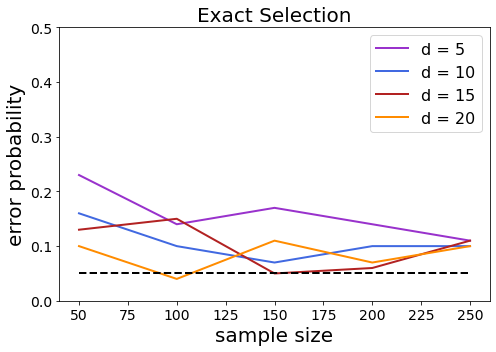

In [5]:
plt.figure(figsize=(7, 5))
colors=['darkorchid', 'royalblue', 'firebrick', 'darkorange', 'forestgreen']
for d_iter in range(4):
    d = d_inc * (d_iter+1)
    plt.plot(n_list, results_rand[d_iter], color=colors[d_iter], label="d = " + str(d), linewidth=2)
plt.plot(n_list, err_lvl*np.ones(5), '--', color="black", linewidth=2)
plt.xlabel("sample size", fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("error probability", fontsize=20)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.title("Exact Selection", fontsize=20)
plt.ylim((0.0, 0.5))
plt.tight_layout();